In [1]:
import sys
import oqupy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma_x = oqupy.operators.sigma("x")
sigma_y = oqupy.operators.sigma("y")
sigma_z = oqupy.operators.sigma("z")
up_density_matrix = oqupy.operators.spin_dm("z+")
down_density_matrix = oqupy.operators.spin_dm("z-")
mixed_density_matrix = oqupy.operators.spin_dm("mixed")

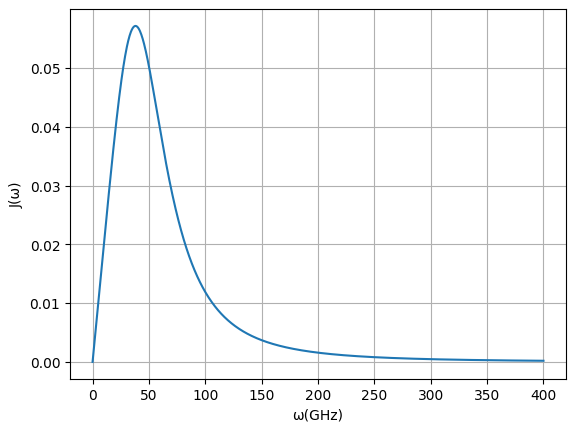

In [3]:
w = np.linspace(0,400,1000)
Jw = ((0.002) * w)/(1 + (w**2/(800*np.pi))**2)
plt.plot(w, Jw)
plt.xlabel('ω(GHz)')
plt.ylabel('J(ω)')
#plt.xticks([8])
plt.grid()

In [4]:
def sd(w):
    return ((0.002) * w)/(1 + (w**2/(800*np.pi))**2)

In [5]:
Omega = 8.0
temperature = 0.01

In [6]:
correlations = oqupy.correlations.CustomSD(j_function = sd ,
                                          cutoff = 400,
                                          cutoff_type = 'hard',
                                          temperature = temperature)

In [7]:
tempo_parameters = oqupy.TempoParameters(dt=0.0085, dkmax=30, epsrel=10**(-7))

/home/eobutler/dev/luisa_debug/oqupy/helpers.py:113: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


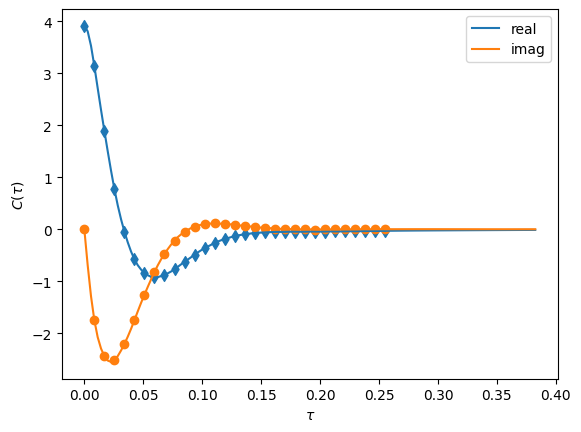

In [8]:
oqupy.helpers.plot_correlations_with_parameters(correlations,tempo_parameters)
plt.show()

In [9]:
system = oqupy.System(0.5 * Omega * (sigma_z))
bath = oqupy.Bath(sigma_x, correlations) 
initial_state = mixed_density_matrix

max_time = 5.0

In [10]:
process_tensor = oqupy.pt_tempo_compute(bath=bath,
                                        start_time= 0,
                                        end_time= max_time,
                                        parameters=tempo_parameters)

print('internal bond dimensions')
print(process_tensor.get_bond_dimensions())

--> PT-TEMPO computation:
100.0%  588 of  588 [########################################] 00:00:59
Elapsed time: 59.8s
internal bond dimensions
[ 1  4  8 10 13 13 16 16 18 19 20 22 22 23 23 25 25 27 27 30 30 32 32 34
 33 35 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36
 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36 35 36

--> Compute dynamics:
100.0%  588 of  588 [########################################] 00:00:05
Elapsed time: 5.6s


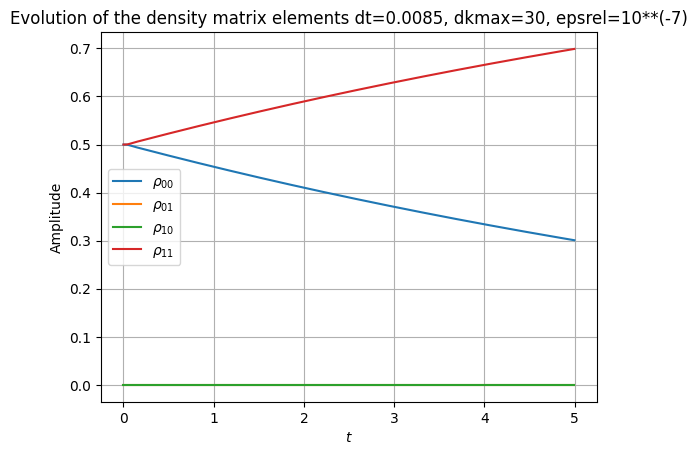

In [11]:
dyns = oqupy.contractions.compute_dynamics(
    system=system,
    initial_state=initial_state,
    process_tensor=process_tensor)
times, states = dyns.times, dyns.states
plt.plot(times, states[:,0,0].real, label=r'$\rho_{00}$')
plt.plot(times, states[:,0,1].real, label=r'$\rho_{01}$')
#plt.plot(times, states[:,0,1].imag, label=r'$\Im[\rho_{01}]$')
plt.plot(times, states[:,1,0].real, label=r'$\rho_{10}$')
#plt.plot(times, states[:,1,0].imag, label=r'$\Im[\rho_{01}]$')
plt.plot(times, states[:,1,1].real, label=r'$\rho_{11}$')
#plt.plot(times, states[:,1,1].imag, label=r'$\Im[\rho_{01}]$')
plt.xlabel(r"$ t$")
plt.ylabel(r"Amplitude")
plt.grid()
plt.title('Evolution of the density matrix elements dt=0.0085, dkmax=30, epsrel=10**(-7)')
plt.legend()

/tmp/ipykernel_21866/1300968679.py:1: RuntimeWarning: divide by zero encountered in log
  matrix = states * np.log(states)
/tmp/ipykernel_21866/1300968679.py:1: RuntimeWarning: invalid value encountered in multiply
  matrix = states * np.log(states)
/home/eobutler/dev/venv_luisa/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


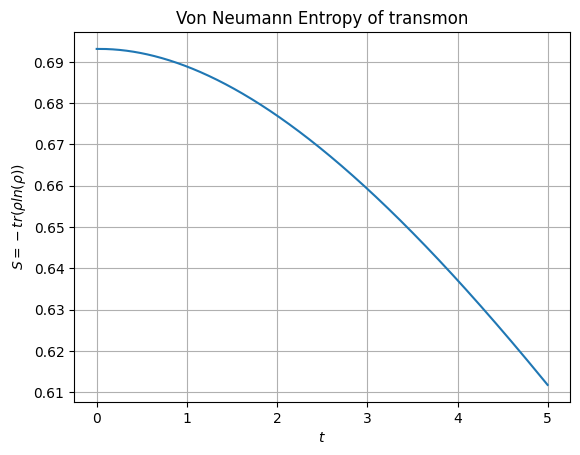

In [12]:
matrix = states * np.log(states)
S = [-np.trace(mat) for mat in matrix]
plt.plot(times, S)
plt.xlabel(r"$ t$")
plt.ylabel(r"$ S=-tr(\rho ln(\rho))$")
plt.title('Von Neumann Entropy of transmon')
plt.grid()

In [13]:
tempo_sys = oqupy.Tempo(system=system,
                        bath=bath,
                        initial_state=initial_state,
                        start_time=0,
                        parameters=tempo_parameters)
dynamics = tempo_sys.compute(end_time= max_time)

--> TEMPO computation:
100.0%  588 of  588 [########################################] 00:00:52
Elapsed time: 52.6s


In [14]:
t = np.linspace(0,max_time,100)

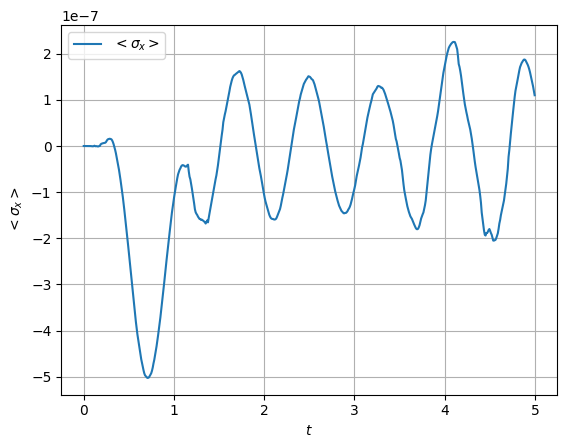

In [15]:
t, s_x = dynamics.expectations(sigma_x, real=True)
t, s_y = dynamics.expectations(sigma_y, real=True)
t, s_z = dynamics.expectations(sigma_z, real=True)

plt.plot(t, s_x, label=r'$<\sigma_{x}>$')
plt.xlabel(r'$t$')
plt.ylabel(r'$<\sigma_{x}>$')
#plt.ylim((0.0,1.0))
plt.grid()
plt.legend()


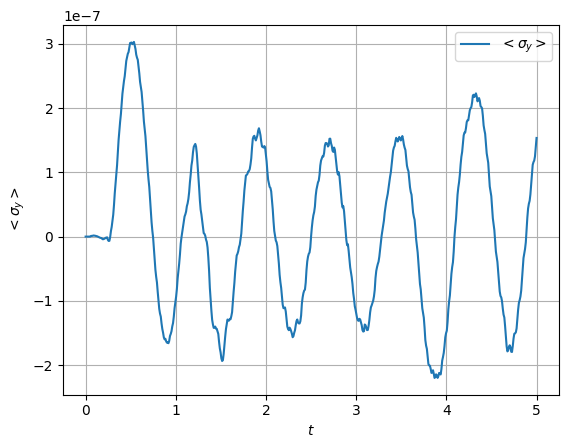

In [16]:
plt.plot(t, s_y, label=r'$<\sigma_{y}>$')
plt.xlabel(r'$t$')
plt.ylabel(r'$<\sigma_{y}>$')
#plt.ylim((0.0,1.0))
plt.grid()
plt.legend()

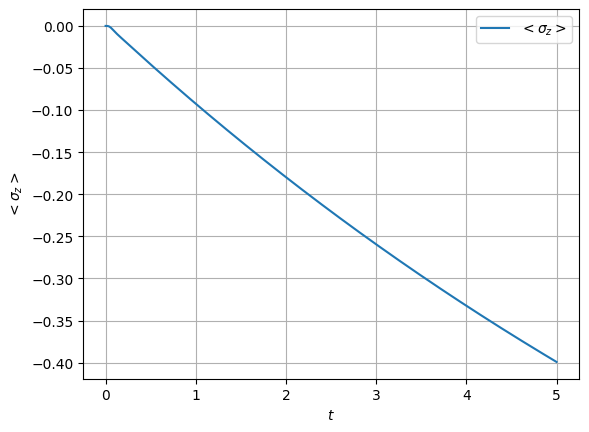

In [17]:
plt.plot(t, s_z, label=r'$<\sigma_{z}>$')
plt.xlabel(r'$t$')
plt.ylabel(r'$<\sigma_{z}>$')
#plt.ylim((0.0,1.0))
plt.grid()
plt.legend()

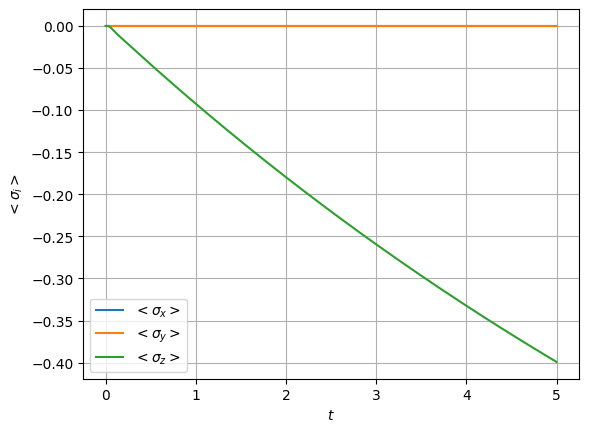

In [18]:
t, s_x = dynamics.expectations(sigma_x, real=True)
t, s_y = dynamics.expectations(sigma_y, real=True)
t, s_z = dynamics.expectations(sigma_z, real=True)

plt.plot(t, s_x, label=r'$<\sigma_{x}>$')
plt.plot(t, s_y, label=r'$<\sigma_{y}>$')
plt.plot(t, s_z, label=r'$<\sigma_{z}>$')
plt.xlabel(r'$t$')
plt.ylabel(r'$<\sigma_{i}>$')
#plt.ylim((0.0,1.0))
plt.grid()
plt.legend()